# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 11: *Transformations*
Performs geometric transformations to an image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadRGB, imageReadL, plotImageRGB, createImageRGB 
from PlotUtilities import plot3DColorHistogram
                         
# Math and iteration
from math import sin, cos, sqrt 
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    maskName = Mask image name
    transformationType  = Similarity, Affine, Homography 

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter11/Input/")
imageName = "cube1.png"
maskName = "mask1.png"
transformationType  = "Homography"

### Show input image

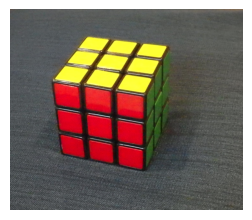

In [3]:
inputImage, width, height = imageReadRGB(pathToDir + imageName)
maskImage, width, height = imageReadL(pathToDir + maskName)
plotImageRGB(inputImage, figureSize = 3) 

### Define transformation

In [4]:
# Perform transformation
if transformationType  == "Similarity":
    # Similarity transformation
    s = [.4, 0.8, 0.8, 100.0, 0.0] # Angle, scaleXY, translationXY
    T = [[ s[1]*cos(s[0]), s[1]*sin(s[0]), s[3]],                        \
         [ -s[2]*sin(s[0]), s[2]*cos(s[0]), s[4]],                       \
         [0 ,0, 1]]
if transformationType  == "Affine":
    # Affine transformation
    T = [[ .8, .1, 100],                                                  \
         [ -.2, 1, 0],                                                    \
         [0 ,0, 1]]
if transformationType  == "Homography":
    # Homography
    T = [[ .8, 0, 100],                                                    \
         [ .2,1, 0],                                                       \
         [.0005 ,-0.0005 , 1.2]]

### Transform

In [5]:
# Image cente
centreX, centreY = width/2, height/2

tImage = createImageRGB(width, height)
for y, x in itertools.product(range(0, height-1), range(0, width-1)):
    # Alpha and colour   
    alpha = maskImage[y,x]/256.0 
    if alpha == 0: 
        continue
    rgb = (inputImage[y,x]/4.0   + inputImage[y+1,x+1]/4.0 +                \
           inputImage[y+1,x]/4.0 + inputImage[y,x+1]/4.0) * alpha
    
    # Transform
    cx, cy = x - centreX, y - centreY
    p0z = T[2][0] * cx + T[2][1] * cy + T[2][2] 
    p1z = T[2][0] * (cx+1) + T[2][1] * cy + T[2][2] 
    p2z = T[2][0] * (cx+1) + T[2][1] * (cy+1) + T[2][2] 
    
    if p0z != 0 and p1z != 0 and p2z !=0:
        p0x = int((T[0][0] * cx + T[0][1] * cy + T[0][2]) / p0z + centreX)
        p0y = int((T[1][0] * cx + T[1][1] * cy + T[1][2]) / p0z + centreY) 
        p1x = int((T[0][0] * (cx+1) + T[0][1] * cy + T[0][2]) / p1z + centreX)
        p1y = int((T[1][0] * (cx+1) + T[1][1] * cy + T[1][2]) / p1z + centreY) 
        p2x = int((T[0][0] * (cx+1) + T[0][1] * (cy+1) + T[0][2]) / p2z + centreX)
        p2y = int((T[1][0] * (cx+1) + T[1][1] * (cy+1) + T[1][2]) / p2z + centreY) 
        
        # Fill output image
        v1,v2 = [p1x - p0x, p1y - p0y], [p2x - p0x, p2y - p0y]
        
        lv1 = max(.001,sqrt(v1[0]*v1[0] + v1[1]*v1[1]))
        lv2 = max(.001,sqrt(v2[0]*v2[0] + v2[1]*v2[1]))
        v1N = [v1[0]/lv1, v1[1]/lv1]
        v2N = [v2[0]/lv2, v2[1]/lv2]
    
        for dV1, dV2 in itertools.product(range(0, int(lv1)+1), range(0, int(lv2)+1)):
            a = int(p0x + dV1 * v1N[0] + dV2 * v2N[0])
            b = int(p0y + dV1 * v1N[1] + dV2 * v2N[1])
            if a>0 and a < width and b > 0 and b < height:
                tImage[b,a] = rgb
      

### Show transformed image

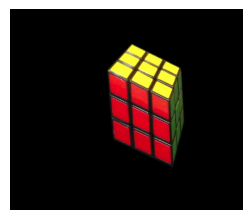

In [6]:
plotImageRGB(tImage, figureSize = 3)  